### <left><b><font size=4>Section 3 – Unsupervised Learning – Clustering<b><left>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

# Clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV


In [2]:
if not (os.path.isfile("df_features_bow_sampled.parquet") and os.path.isfile("df_features_tfidf_sampled.parquet")):
    raise Exception("You should run the section 1 before")
df_features_bow_sampled = pd.read_parquet("df_features_bow_sampled.parquet")
df_features_tfidf_sampled = pd.read_parquet("df_features_tfidf_sampled.parquet")


X = df_features_tfidf_sampled.drop(columns=["Set_Fingerprint"])
df_features_tfidf_sampled

,Set_Fingerprint,enable,system,sh,cat,proc,mounts,bin,busybox,cd,...,top,sleep,tar,passwd,nc,mkdir,unix,mv,nohup,tsm
200746,"[Discovery, Persistence]",0.128896,0.065000,0.0,0.0,0.0,0.238360,0.000000,0.0,0.0,...,0.000000,0.0,0.321332,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.064460
45062,"[Discovery, Persistence]",0.102431,0.051655,0.0,0.0,0.0,0.189420,0.000000,0.0,0.0,...,0.000000,0.0,0.255357,0.051113,0.0,0.153660,0.0,0.358258,0.000000,0.051225
229890,"[Discovery, Persistence]",0.099139,0.049994,0.0,0.0,0.0,0.183331,0.000000,0.0,0.0,...,0.000000,0.0,0.247149,0.049470,0.0,0.148720,0.0,0.346742,0.000000,0.049578
221761,"[Discovery, Persistence]",0.136394,0.068782,0.0,0.0,0.0,0.252226,0.000000,0.0,0.0,...,0.000000,0.0,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.068210
159752,"[Discovery, Persistence]",0.136394,0.068782,0.0,0.0,0.0,0.252226,0.000000,0.0,0.0,...,0.000000,0.0,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.068210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171360,[Impact],0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
166018,"[Discovery, Persistence, Defense Evasion, Harm...",0.000000,0.105743,0.0,0.0,0.0,0.048471,0.336859,0.0,0.0,...,0.094006,0.0,0.156824,0.000000,0.0,0.000000,0.0,0.419085,0.509673,0.000000
132486,"[Discovery, Persistence, Defense Evasion, Impa...",0.000000,0.135173,0.0,0.0,0.0,0.030980,0.215306,0.0,0.0,...,0.060085,0.0,0.133647,0.000000,0.0,0.000000,0.0,0.502240,0.325761,0.000000
232782,"[Discovery, Impact, Execution, Persistence]",0.000000,0.109716,0.0,0.0,0.0,0.050292,0.480583,0.0,0.0,...,0.048769,0.0,0.162716,0.000000,0.0,0.000000,0.0,0.434830,0.088137,0.000000


#### K-Means Algorithm

In [3]:
# Step 1: Elbow Method
n_cluster_list=[]
inertia_list=[]
silhouette_list = []
ri_list = []
ari_list = []

for n_clusters in range(3, 17):
    kmeans_new = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    cl_labels = kmeans_new.fit_predict(X)
        
    silhouette_value= silhouette_score(X, kmeans_new.labels_)
    silhouette_list.append(silhouette_value)

    inertia_list.append(kmeans_new.inertia_)
    n_cluster_list.append(n_clusters)


In [4]:
print(silhouette_list)
print(inertia_list)

[0.8653242070284147, 0.8538190249978079, 0.8630785742250475, 0.8365159039812186, 0.8527367195801014, 0.8777853821634845, 0.8878489424353245, 0.8891740168742414, 0.8786686095267343, 0.879789024734345, 0.8803419184006704, 0.8826319383244061, 0.8829606594311866, 0.8897791115971725]
[208.51103610421785, 186.74563354476396, 159.12894284888247, 135.53075260138817, 118.89565889810316, 108.5086256700259, 96.04215310894634, 89.20157379858736, 80.50571893522132, 79.06366970617529, 75.57192467406331, 69.6140869001743, 67.95834037667942, 60.28099123451544]


**Elbow Method**

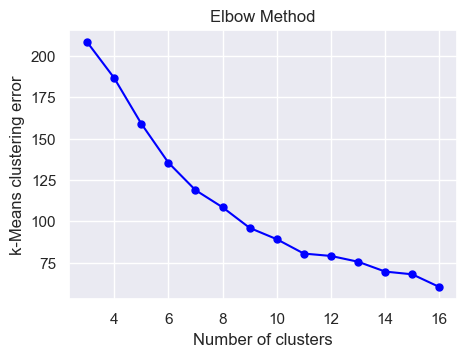

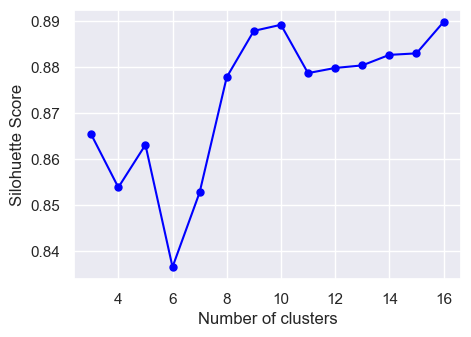

Size of each cluster:  [2687 2107  451   11  237   19   58    4   21   16  136   65    7   10
    5   19]


In [5]:
# Plot k-Means clustering error 
# Set up Seaborn style
sns.set_theme(style="darkgrid")

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, inertia_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

(unique, counts) = np.unique(kmeans_new.labels_, return_counts=True)
print("Size of each cluster: ", counts)

#### Gaussian Mixture Model Algorithm (GMM)

In [6]:
n_cluster_list=[]
silhouette_list_gmm= []
log_l_list=[]

for n_clusters in range(3, 17):
    gmm = GaussianMixture(n_components = n_clusters, random_state=42)
    gmm_label = gmm.fit_predict(X)
      
    silhouette_value = silhouette_score(X, gmm_label)
    silhouette_list_gmm.append(silhouette_value)
    
    log_l_list.append(gmm.score(X))
    n_cluster_list.append(n_clusters)

In [7]:
print(silhouette_list_gmm)
print(log_l_list)

[0.8652982741232674, 0.8538190249978079, 0.8359213151262611, 0.8321884805343579, 0.8527367195801014, 0.8777853821634845, 0.8878489424353245, 0.887776972776204, 0.8772890655552679, 0.8775918555717231, 0.8803419184006704, 0.8826319383244061, 0.8829606594311866, 0.8897791115971725]
[172.3986206879848, 188.1349833997195, 210.12518436872656, 213.31971385186668, 201.96487871178365, 201.8496358156564, 203.89299929681076, 223.85305820316933, 226.2269518576111, 226.42314807038932, 208.51615637606676, 209.05715731617514, 208.79962952823882, 211.5460201208794]


**Elbow Method**

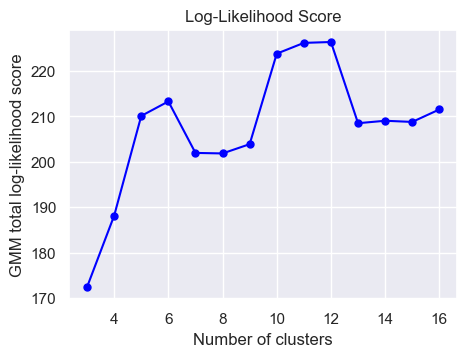

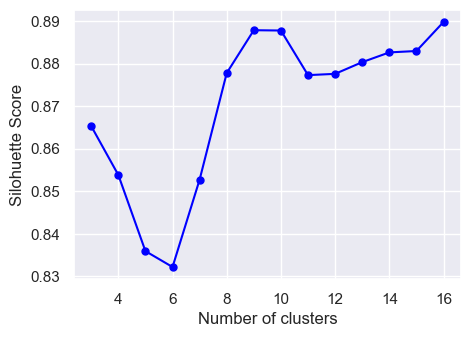

Effetive size of each cluster:  [0.45908081 0.35998633 0.0770545  0.00187938 0.04049206 0.0032462
 0.00990945 0.00068341 0.0035879  0.00273364 0.02323595 0.01110542
 0.00119597 0.00170853 0.00085426 0.0032462 ]


In [8]:
# Set up Seaborn style
sns.set_theme(style="darkgrid")

# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, log_l_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.title('Log-Likelihood Score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list_gmm, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

# report effective size
print("Effetive size of each cluster: ", gmm.weights_)


**3.2. Tune other hyper-parameters, if any.**

In [9]:
param_grid_kmeans = {
    'init': ['k-means++', 'random'],
    'n_init':  list(range(2, 21, 2)),
    'max_iter':  list(range(50, 501, 50)),
}

# Create KMeans object
kmeans = KMeans(n_clusters=10, random_state=42)

# Create RandomizedSearchCV object
grid_search_kmeans = GridSearchCV(kmeans, param_grid = param_grid_kmeans, cv=5)

# Fit the randomized search to your data
grid_search_kmeans.fit(X)  # X is your dataset

# Get the best parameters
best_params_kmenas = grid_search_kmeans.best_params_
print("Best parameters:", best_params_kmenas)


Best parameters: {'init': 'k-means++', 'max_iter': 50, 'n_init': 4}


In [10]:
kmeans_tuned = KMeans(n_clusters=10, init=best_params_kmenas['init'], n_init=best_params_kmenas['n_init'], max_iter=best_params_kmenas['max_iter'], random_state=42)
cl_labels_tuned = kmeans_tuned.fit_predict(X)
    
silhouette_value= silhouette_score(X, kmeans_tuned.labels_)

inertia = (kmeans_tuned.inertia_)
print("Silhouette: ", silhouette_value)
print("Inertia: ", inertia)

Silhouette:  0.8825492824862194
Inertia:  84.86594784274978


##### Tunning the hyper-parameters of GMM 

In [11]:
def silhouette_scorer(gmm, X):
    labels = gmm.fit_predict(X)
    return silhouette_score(X, labels)

param_grid_gmm = {
    'init_params': ['kmeans'], 
    'covariance_type': ['full', 'spherical'], # 'tied', 'diag' have been deleted because never selected
    'tol': [1e-3, 1e-4, 1e-5], 
    'max_iter': list(range(50, 300, 50)),
}

# Create GaussianMixture object
gmm = GaussianMixture(n_components=10,random_state=42)

# Create GridSearchCV object
grid_search_gmm = GridSearchCV(gmm, param_grid_gmm, cv=5, scoring = silhouette_scorer)

# Fit the grid search to your data
grid_search_gmm.fit(X)  # X is your dataset

# Get the best parameters
best_params_gmm = grid_search_gmm.best_params_
print("Best parameters:", best_params_gmm)

Best parameters: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 50, 'tol': 0.001}


In [12]:
gmm_tuned = GaussianMixture(n_components = 10, random_state=42, init_params=best_params_gmm['init_params'], covariance_type=best_params_gmm['covariance_type'], max_iter=best_params_gmm['max_iter'], tol=best_params_gmm['tol'])
gmm_label_tuned = gmm_tuned.fit_predict(X)
    
silhouette_value = silhouette_score(X, gmm_label_tuned)

log_l_tuned = (gmm_tuned.score(X))

print("Silhouette: ", silhouette_value)
print("Log-l: ", log_l_tuned)



Silhouette:  0.887776972776204
Log-l:  223.85305820316933


**3.3. Visualize the clusters through t-SNE visualization.**

In [13]:
#LET'S APPLY THE t-SNE TO THE DATASET, TO REDUCE THE NUMBER OF COMPONENTS

originalDF = pd.DataFrame(X)

tsne = TSNE(n_components=2, random_state=42).fit_transform(originalDF.values)

df_tsne = pd.DataFrame(tsne)
df_tsne

#NOW WE HAVE THE 2 COMPONENTS and WE CAN APPLY IT TO BOTH THE ALGORITHM


,0,1
0,-37.612614,6.101838
1,-35.631668,-28.890806
2,-35.527679,-28.723497
3,11.023290,47.123890
4,11.023290,47.123890
...,...,...
5848,35.659809,-19.617393
5849,38.794060,-16.274822
5850,38.809639,-16.154642
5851,38.830620,-16.057684


**K-means**

,x1,x2,cluster
0,-37.612614,6.101838,8
1,-35.631668,-28.890806,5
2,-35.527679,-28.723497,5
3,11.023290,47.123890,0
4,11.023290,47.123890,0
...,...,...,...
5848,35.659809,-19.617393,7
5849,38.794060,-16.274822,7
5850,38.809639,-16.154642,7
5851,38.830620,-16.057684,7


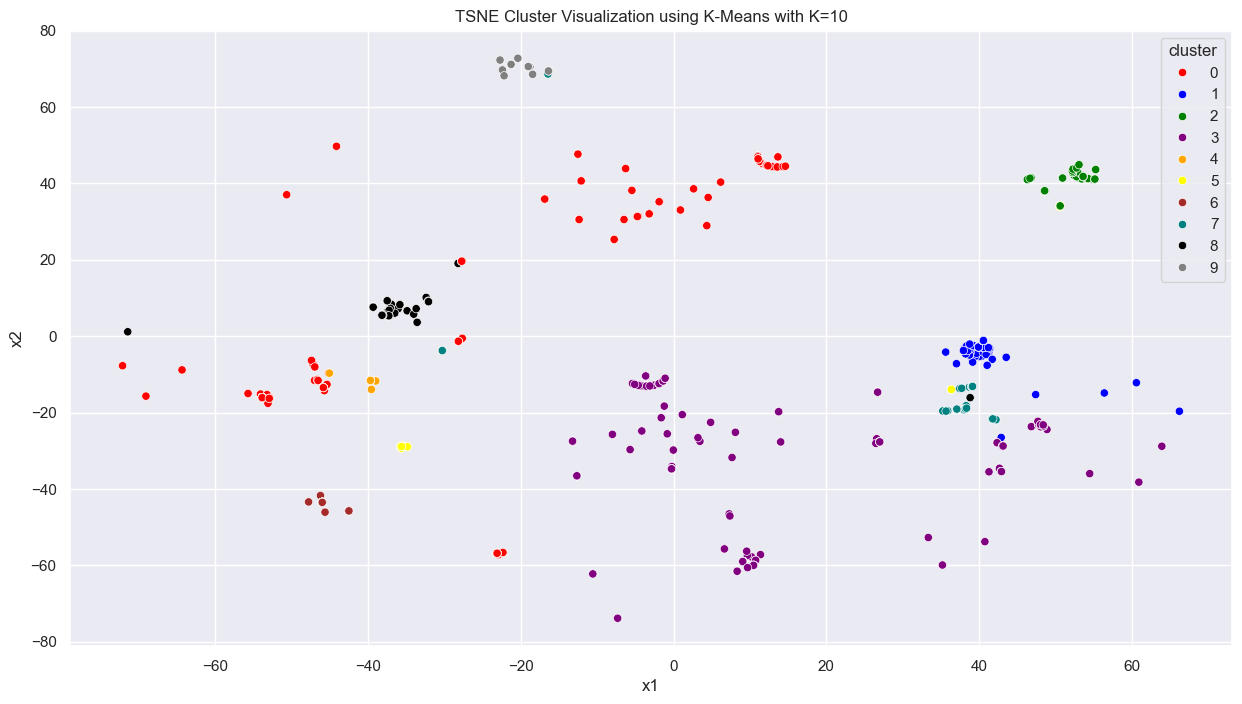

In [14]:
labels_kmeans_tuned = kmeans_tuned.labels_

df_tsne_kmeans = pd.DataFrame(df_tsne)
df_tsne_kmeans["cluster"] = labels_kmeans_tuned
df_tsne_kmeans.columns = ["x1", "x2", "cluster"]


fig, ax = plt.subplots(figsize=(15,8))
#custom color palette, to distinguish beter the clusters
cluster_colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown", "teal", "black", "grey"]

sns.scatterplot(data=df_tsne_kmeans, x='x1', y='x2', hue='cluster',  palette=cluster_colors, legend="full")
ax.set_title('TSNE Cluster Visualization using K-Means with K=10')
df_tsne_kmeans

**GMM**

,x1,x2,cluster
0,-37.612614,6.101838,4
1,-35.631668,-28.890806,3
2,-35.527679,-28.723497,4
3,11.023290,47.123890,3
4,11.023290,47.123890,3
...,...,...,...
5848,35.659809,-19.617393,3
5849,38.794060,-16.274822,9
5850,38.809639,-16.154642,5
5851,38.830620,-16.057684,5


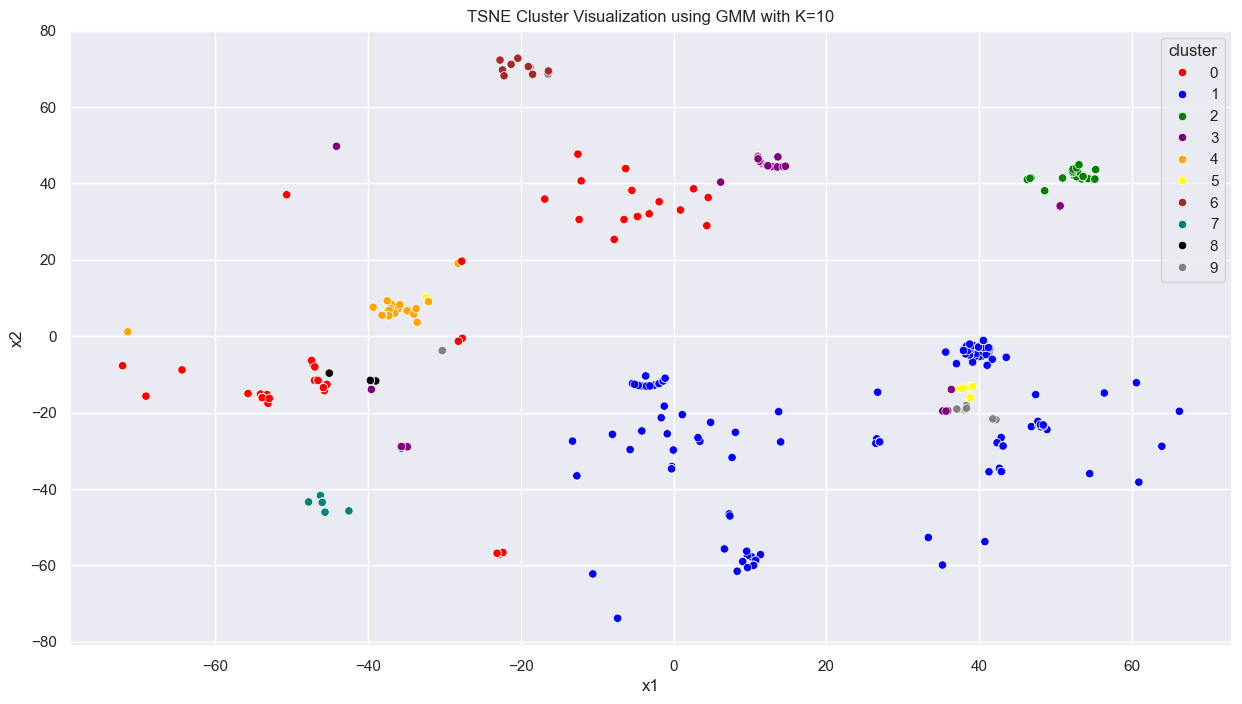

In [16]:
labels_gmm_tuned = gmm_tuned.predict(X)


df_tsne_gmm = pd.DataFrame(df_tsne)
df_tsne_gmm["cluster"] = labels_gmm_tuned
df_tsne_gmm.columns = ["x1", "x2", "cluster"]


fig, ax = plt.subplots(figsize=(15,8))
#custom color palette, to distinguish beter the clusters
cluster_colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown", "teal", "black", "grey"]

sns.scatterplot(data=df_tsne_gmm, x='x1', y='x2', hue='cluster',  palette=cluster_colors, legend="full")
ax.set_title('TSNE Cluster Visualization using GMM with K=10')
df_tsne_gmm

**3.4. Cluster analysis. Analyze the characteristics of each cluster. This might involve examining the most frequent words in each cluster (try word cloud). Try to understand which are the most
representative.**

##### Most Frequent Words for the K-Means Cluster Algorithm

In [18]:
optimal_clusters = 10

df_cluster = pd.DataFrame(X)
df_cluster["cluster_kmeans"] = labels_kmeans_tuned


Cluster 8: 25
['mv', 'rm', 'which', 'tar', 'dev', 'wget', 'mounts', 'bash', 'tmp', 'uname', 'mkdir', 'chpasswd', 'enable', 'grep', 'exit', 'head', 'system', 'count', 'tsm', 'passwd', 'cp', 'name', 'awk', 'bin', 'var']


Cluster 5: 26
['echo', 'mv', 'rm', 'tar', 'wget', 'uname', 'which', 'dev', 'mounts', 'tmp', 'bash', 'mkdir', 'sh', 'chpasswd', 'exit', 'enable', 'grep', 'head', 'crontab', 'system', 'tsm', 'count', 'passwd', 'cp', 'ss', 'print']


Cluster 0: 33
['mv', 'rm', 'tar', 'dev', 'mounts', 'wget', 'tmp', 'uname', 'mkdir', 'bash', 'chpasswd', 'grep', 'enable', 'exit', 'head', 'tsm', 'count', 'cp', 'passwd', 'system', 'bin', 'awk', 'busybox', 'cat', 'name', 'cd', 'top', 'crontab', 'sh', 'nc', 'print', 'which', 'ss']


Cluster 6: 23
['mv', 'ss', 'rm', 'tar', 'dev', 'mounts', 'wget', 'bash', 'mkdir', 'tmp', 'uname', 'chpasswd', 'enable', 'grep', 'exit', 'head', 'system', 'tsm', 'count', 'passwd', 'cp', 'which', 'awk']


Cluster 9: 38
['print', 'mv', 'rm', 'tar', 'wget', 'mounts', 'd

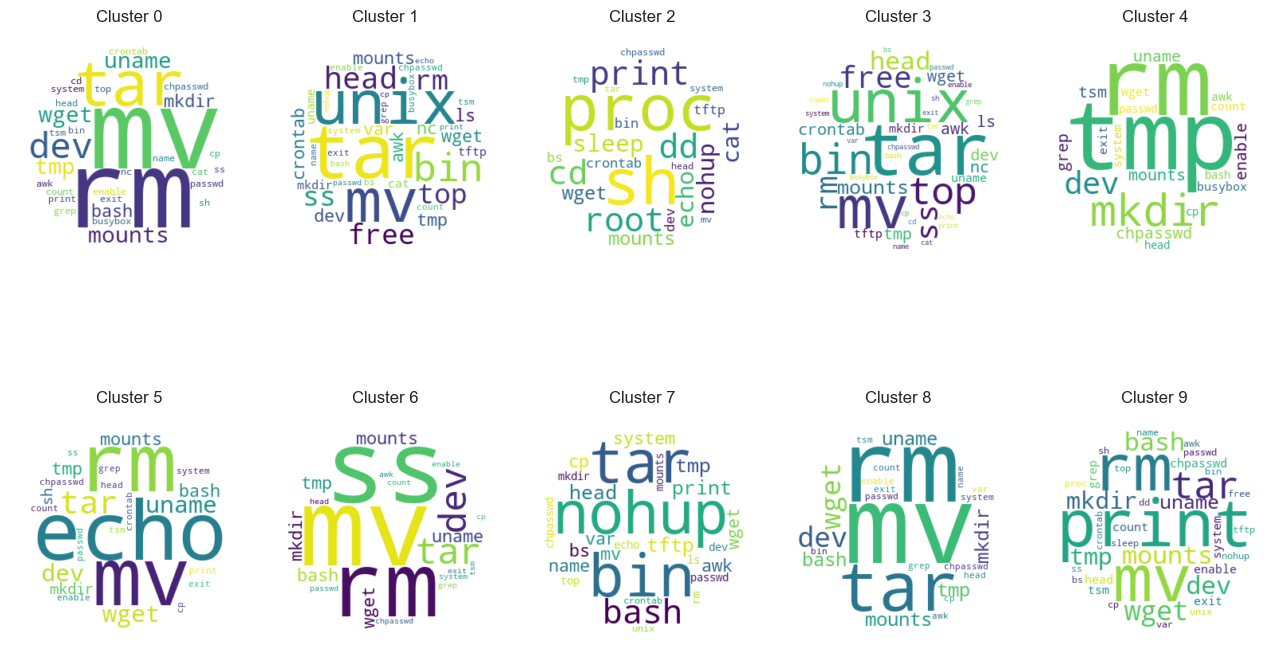

In [19]:
def get_top_words():
    top_words = {}
    for cluster in df_cluster['cluster_kmeans'].unique():
        cluster_data = df_cluster[df_cluster['cluster_kmeans'] == cluster]
        sum_word_frequencies = cluster_data.drop('cluster_kmeans', axis=1).sum()
        non_zero_word_frequencies = sum_word_frequencies[sum_word_frequencies > 0]
        n=len(X.columns)
        top_words[cluster] = non_zero_word_frequencies.sort_values(ascending=False).head(n).index.tolist()
    return top_words

top_words_per_cluster = get_top_words()

for cluster, words in top_words_per_cluster.items():
     print(f"Cluster {cluster}:", len(words))
     print(words)
     print("\n")

# Assuming you know the number of clusters for subplot grid
number_of_rows = 2
number_of_columns = 5  # Assuming you want 3 clusters per row

fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(13, 9))  # Adjust figsize as needed

for cluster, cluster_text in top_words_per_cluster.items():
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    # Check and potentially convert cluster_text to string
    if not isinstance(cluster_text, str):
        cluster_text = ' '.join(cluster_text)  # Join list elements if needed

    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap="viridis",
                          mask=mask, contour_color='grey').generate(cluster_text)

    row_index = cluster // number_of_columns
    col_index = cluster % number_of_columns

    axes[row_index, col_index].imshow(wordcloud, interpolation='bilinear')
    axes[row_index, col_index].set_title(f'Cluster {cluster}')
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()

##### Most Frequent Words for the GMM Cluster Algorithm

In [20]:
optimal_clusters = 10  # Optimal number of clusters
df_cluster["cluster_gmm"] = labels_gmm_tuned


Cluster 4: 24
['cluster_kmeans', 'mv', 'rm', 'which', 'tar', 'dev', 'mounts', 'wget', 'bash', 'tmp', 'uname', 'mkdir', 'chpasswd', 'enable', 'grep', 'exit', 'head', 'system', 'count', 'tsm', 'passwd', 'cp', 'name', 'echo']


Cluster 3: 28
['mv', 'rm', 'tar', 'dev', 'mounts', 'wget', 'bash', 'mkdir', 'uname', 'tmp', 'chpasswd', 'exit', 'enable', 'grep', 'head', 'system', 'cluster_kmeans', 'tsm', 'count', 'passwd', 'cp', 'echo', 'sh', 'which', 'bs', 'crontab', 'print', 'ss']


Cluster 0: 32
['mv', 'rm', 'tar', 'mounts', 'dev', 'tmp', 'uname', 'wget', 'mkdir', 'chpasswd', 'grep', 'enable', 'exit', 'bash', 'head', 'tsm', 'count', 'cp', 'passwd', 'bin', 'awk', 'system', 'busybox', 'cat', 'name', 'cd', 'top', 'crontab', 'nc', 'print', 'which', 'ss']


Cluster 7: 25
['cluster_kmeans', 'mv', 'ss', 'rm', 'tar', 'dev', 'mounts', 'wget', 'bash', 'mkdir', 'tmp', 'uname', 'chpasswd', 'enable', 'grep', 'exit', 'head', 'system', 'tsm', 'count', 'passwd', 'cp', 'echo', 'which', 'awk']


Cluster 6: 39


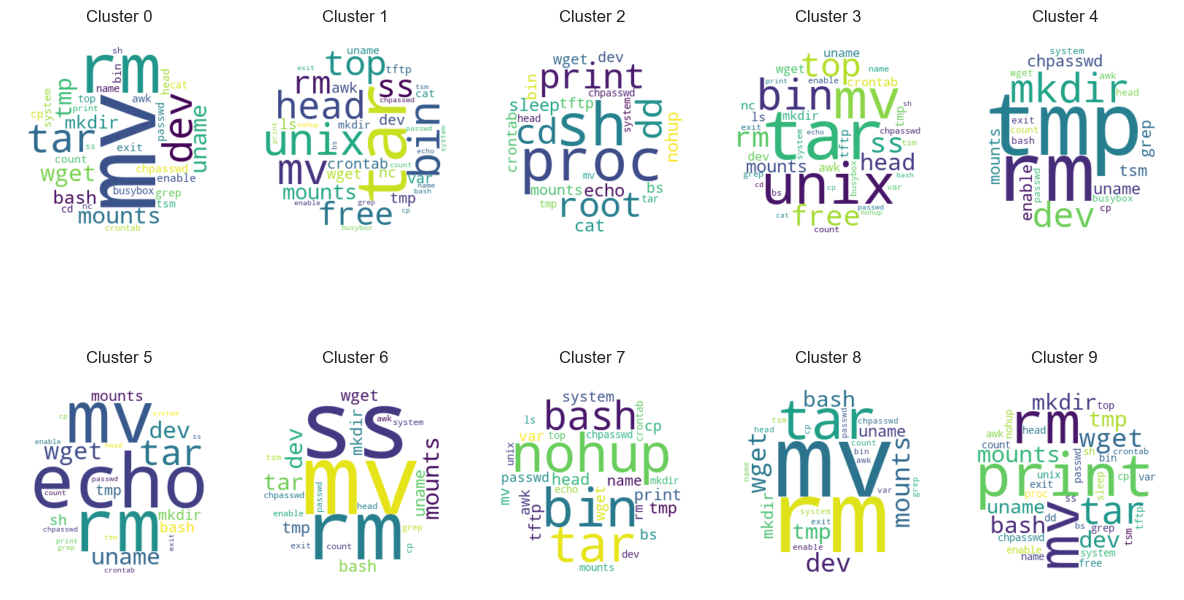

In [21]:
# Function to get the top N words in each cluster
def get_top_words():
    top_words_gmm = {}
    for cluster_i in df_cluster['cluster_gmm'].unique():
        cluster_data_gmm = df_cluster[df_cluster['cluster_gmm'] == cluster_i]
        sum_word_frequencies_gmm = cluster_data_gmm.drop(['cluster_gmm'], axis=1).sum()
        non_zero_word_frequencies_gmm = sum_word_frequencies_gmm[sum_word_frequencies_gmm > 0]
        n=len(df_cluster.columns)
        top_words_gmm[cluster_i] = non_zero_word_frequencies_gmm.sort_values(ascending=False).head(n).index.tolist()
    return top_words_gmm

top_words_per_cluster_gmm = get_top_words()

for cluster_gmm, words_gmm in top_words_per_cluster_gmm.items():
    print(f"Cluster {cluster_gmm}:", len(words_gmm))
    print(words_gmm)
    print("\n")

#Assuming you know the number of clusters for subplot grid
number_of_rows = 2
number_of_columns = 5  # Assuming you want 3 clusters per row

fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(12, 8))  # Adjust figsize as needed

for cluster, cluster_text in top_words_per_cluster.items():
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    # Check and potentially convert cluster_text to string
    if not isinstance(cluster_text, str):
        cluster_text = ' '.join(cluster_text)  # Join list elements if needed

    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap="viridis",
                          mask=mask, contour_color='grey').generate(cluster_text)

    row_index = cluster // number_of_columns
    col_index = cluster % number_of_columns

    axes[row_index, col_index].imshow(wordcloud, interpolation='bilinear')
    axes[row_index, col_index].set_title(f'Cluster {cluster}')
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()

**3.5. Do clusters reflect intent division, i.e., are the clusters homogeneous in terms of intents? How are intents divided into the clusters?**

In [22]:
# Adding the Fingerprint column to df_cluster 
df_cluster = pd.DataFrame(X)
df_cluster["cluster_kmeans"] = labels_kmeans_tuned
df_cluster["cluster_gmm"] = labels_gmm_tuned
df_cluster['Set_Fingerprint'] = df_features_tfidf_sampled['Set_Fingerprint']
df_cluster

,enable,system,sh,cat,proc,mounts,bin,busybox,cd,dev,...,passwd,nc,mkdir,unix,mv,nohup,tsm,cluster_kmeans,cluster_gmm,Set_Fingerprint
200746,0.128896,0.065000,0.0,0.0,0.0,0.238360,0.000000,0.0,0.0,0.238736,...,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.064460,8,4,"[Discovery, Persistence]"
45062,0.102431,0.051655,0.0,0.0,0.0,0.189420,0.000000,0.0,0.0,0.189720,...,0.051113,0.0,0.153660,0.0,0.358258,0.000000,0.051225,5,3,"[Discovery, Persistence]"
229890,0.099139,0.049994,0.0,0.0,0.0,0.183331,0.000000,0.0,0.0,0.183621,...,0.049470,0.0,0.148720,0.0,0.346742,0.000000,0.049578,5,4,"[Discovery, Persistence]"
221761,0.136394,0.068782,0.0,0.0,0.0,0.252226,0.000000,0.0,0.0,0.252625,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.068210,0,3,"[Discovery, Persistence]"
159752,0.136394,0.068782,0.0,0.0,0.0,0.252226,0.000000,0.0,0.0,0.252625,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.068210,0,3,"[Discovery, Persistence]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171360,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,7,3,[Impact]
166018,0.000000,0.105743,0.0,0.0,0.0,0.048471,0.336859,0.0,0.0,0.048547,...,0.000000,0.0,0.000000,0.0,0.419085,0.509673,0.000000,7,9,"[Discovery, Persistence, Defense Evasion, Harm..."
132486,0.000000,0.135173,0.0,0.0,0.0,0.030980,0.215306,0.0,0.0,0.062059,...,0.000000,0.0,0.000000,0.0,0.502240,0.325761,0.000000,7,5,"[Discovery, Persistence, Defense Evasion, Impa..."
232782,0.000000,0.109716,0.0,0.0,0.0,0.050292,0.480583,0.0,0.0,0.050371,...,0.000000,0.0,0.000000,0.0,0.434830,0.088137,0.000000,7,5,"[Discovery, Impact, Execution, Persistence]"


In [23]:
df_cluster_exploded = df_cluster.explode("Set_Fingerprint").reset_index()

labels_intents = df_cluster_exploded["Set_Fingerprint"]
cluster_labels_kmeans = df_cluster_exploded["cluster_kmeans"]
cluster_labels_gmm = df_cluster_exploded["cluster_gmm"]

df_cluster_exploded

,index,enable,system,sh,cat,proc,mounts,bin,busybox,cd,...,passwd,nc,mkdir,unix,mv,nohup,tsm,cluster_kmeans,cluster_gmm,Set_Fingerprint
0,200746,0.128896,0.065000,0.0,0.0,0.0,0.238360,0.000000,0.0,0.0,...,0.064319,0.0,0.19336,0.0,0.450819,0.000000,0.064460,8,4,Discovery
1,200746,0.128896,0.065000,0.0,0.0,0.0,0.238360,0.000000,0.0,0.0,...,0.064319,0.0,0.19336,0.0,0.450819,0.000000,0.064460,8,4,Persistence
2,45062,0.102431,0.051655,0.0,0.0,0.0,0.189420,0.000000,0.0,0.0,...,0.051113,0.0,0.15366,0.0,0.358258,0.000000,0.051225,5,3,Discovery
3,45062,0.102431,0.051655,0.0,0.0,0.0,0.189420,0.000000,0.0,0.0,...,0.051113,0.0,0.15366,0.0,0.358258,0.000000,0.051225,5,3,Persistence
4,229890,0.099139,0.049994,0.0,0.0,0.0,0.183331,0.000000,0.0,0.0,...,0.049470,0.0,0.14872,0.0,0.346742,0.000000,0.049578,5,4,Discovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,232782,0.000000,0.109716,0.0,0.0,0.0,0.050292,0.480583,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.434830,0.088137,0.000000,7,5,Persistence
14020,171506,0.000000,0.141465,0.0,0.0,0.0,0.032422,0.112664,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.560657,0.000000,0.000000,8,5,Discovery
14021,171506,0.000000,0.141465,0.0,0.0,0.0,0.032422,0.112664,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.560657,0.000000,0.000000,8,5,Impact
14022,171506,0.000000,0.141465,0.0,0.0,0.0,0.032422,0.112664,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.560657,0.000000,0.000000,8,5,Execution


##### Intents Division into the K-Means Clusters

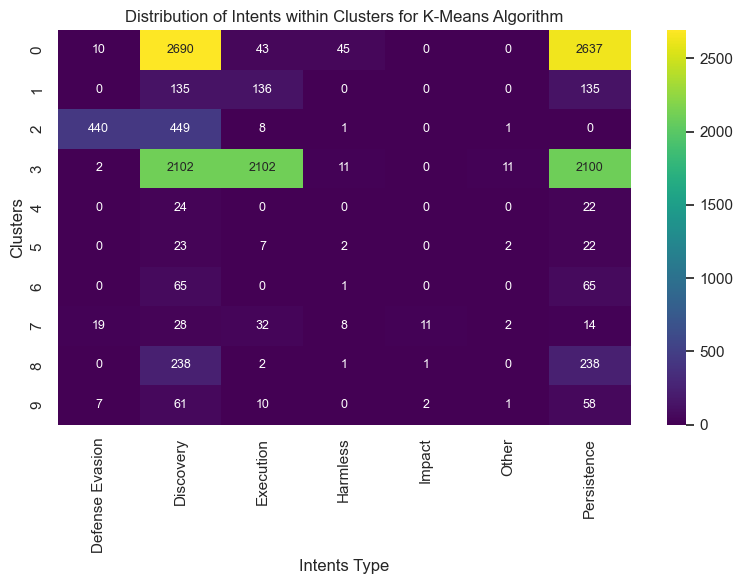

In [24]:
# Predicted cluster labels for the optimal number of clusters
# Creating a data frame with the original labels and the labels predicted by the cluster
# and regrouping them according to the cluster's label
cluster_df = pd.DataFrame({'Set_Fingerprint': labels_intents, 'Cluster': cluster_labels_kmeans})
cluster_counts = cluster_df.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

# Cluster distribution
cluster_counts

# Distribution plot of intents within the Clusters
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_counts, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 9})
plt.title('Distribution of Intents within Clusters for K-Means Algorithm')
plt.xlabel('Intents Type')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()

##### Intents Division into the GMM Clusters

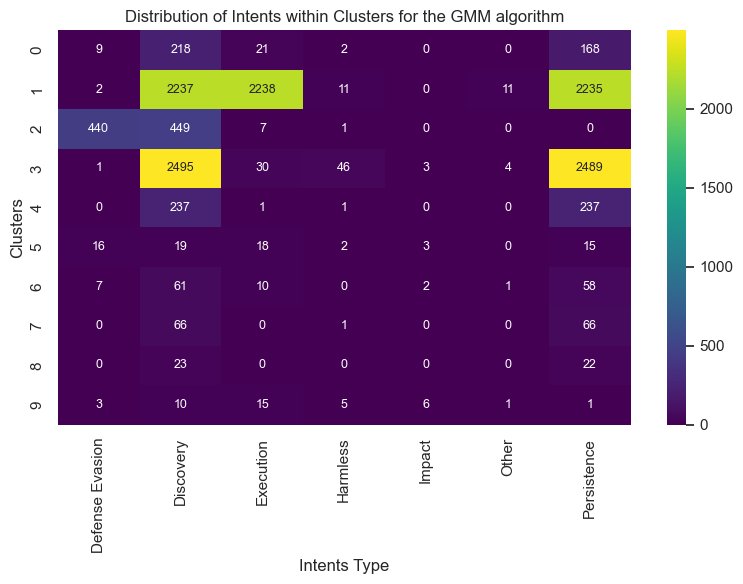

In [25]:
# Predicted cluster labels for the optimal number of clusters
# Creating a data frame with the original labels and the labels predicted by the cluster
# and regrouping them according to the cluster's label
cluster_gmm_df = pd.DataFrame({'Set_Fingerprint': labels_intents, 'Cluster': cluster_labels_gmm})
cluster_counts_gmm = cluster_gmm_df.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

# Cluster distribution
cluster_counts_gmm

# Distribution plot of intents within the Clusters
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_counts_gmm, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 9})
plt.title('Distribution of Intents within Clusters for the GMM algorithm')
plt.xlabel('Intents Type')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()